In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import math

## Plots for statistics: OLS, Lasso, Ridge, OLS_Lasso, OLS_Ridge, Lasso_Ridge

In [2]:
# Generating 'fake' data
def gen_data(nobs, num_cov, m):
    x_1 = np.random.normal(scale=1., size=(nobs))
    x_2 = np.random.normal(scale=1., size=(nobs, num_cov))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = (x_1 * m) + e
    return y, x_1, x_2

# Setup test
def setup_test_params(y, x_1, x_2, a, model):
    X = np.column_stack((x_1, x_2))
    if model == 1:
        ols = sm.OLS(y, X).fit()
        return ols
    elif model == 2:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        return lasso
    elif model == 3:
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return ridge
    elif model == 4:
        ols = sm.OLS(y, X).fit()
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        return ols, lasso
    elif model == 5:
        ols = sm.OLS(y, X).fit()
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return ols, ridge
    elif model == 6:
        lasso = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        ridge = sm.OLS(y, X).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        return lasso, ridge

def standardize(array):
    """divide by variance, multiple by sqrt(n)"""
    return np.sqrt(len(array))*array.mean()/array.std()
    
# MSE
def setup_test_mse(n, k, a, m, model):
    ytr, x_1tr, x_2tr = gen_data(nobs=n, num_cov=k, m=m)
    Xtr = np.column_stack((x_1tr, x_2tr))

    yte, x_1te, x_2te = gen_data(nobs=n, num_cov=k, m=m)   
    Xte = np.column_stack((x_1te, x_2te))
    
    statistic = None
    if model == 1:
        ols = sm.OLS(ytr, Xtr).fit()
        statistic =  (yte-ols.predict(Xte))**2
    elif model == 2:
        lasso = sm.OLS(ytr, Xtr).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        statistic = (yte-lasso.predict(Xte))**2
    elif model == 3:
        ridge = sm.OLS(ytr, Xtr).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        statistic =  (yte-ridge.predict(Xte))**2
    elif model == 4:
        ols = sm.OLS(ytr, Xtr).fit()
        ols_mse = (yte-ols.predict(Xte))**2
        lasso = sm.OLS(ytr, Xtr).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        lasso_mse = (yte-lasso.predict(Xte))**2
        statistic =  ols_mse - lasso_mse
    elif model == 5:
        ols = sm.OLS(ytr, Xtr).fit()
        ols_mse = (yte-ols.predict(Xte))**2
        ridge = sm.OLS(ytr, Xtr).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        ridge_mse = (yte-ridge.predict(Xte))**2
        statistic = ols_mse - ridge_mse
    elif model == 6:
        lasso = sm.OLS(ytr, Xtr).fit_regularized(method='elastic_net', alpha=a, L1_wt=1.0)
        lasso_mse = (yte-lasso.predict(Xte))**2
        ridge = sm.OLS(ytr, Xtr).fit_regularized(method='elastic_net', alpha=a, L1_wt=0.0)
        ridge_mse = (yte-ridge.predict(Xte))**2
        statistic = lasso_mse - ridge_mse
    return standardize(statistic)


# Calculate MSEs
def mse(lst, n, i, model):
    lst_cols = ['statistic_' + str(i)]
    df = pd.DataFrame(lst, columns=lst_cols)
    print("Mean:", np.mean(df)[0], "Median:", np.median(df), "Mode:", stats.mode(df)[0], "Variance:", np.var(df)[0])
    return plt.hist(df['statistic_'+str(i)], label='mse_'+str(i),alpha=0.5)


print(setup_test_mse(1000, 1, .1, 1, 1))

22.97967706889237


### Varying values

In [3]:
# Vary number of observations
def vary_obs(model):
    k = 10
    m = 1
    a = 0.1
    n = [100,250,500,1000]
    for i in n: 
        lst = []
        for j in range(1000):
            results = setup_test_mse(i, k, a, m, model)
            lst.append(results)
        output = mse(lst, i, i, model)
    plt.legend()
    plt.show()

# Vary alpha levels
def vary_alpha(model):
    k = 10
    m = 10
    a = [0,0.1,0.5,1]
    n = 1000
    for i in a: 
        lst = []
        for j in range(1000):
            results = setup_test_mse(n, k, i, m, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()

# Vary number of x variables
def vary_xvars(model):
    k = [1,10,25,50]
    m = 1
    a = 0.1
    n = 1000
    for i in k: 
        lst = []
        for j in range(1000):
            results = setup_test_mse(n, i, a, m, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()

# Vary the model with a multiplicative factor
def vary_multiply(model):
    k = 10
    m = [0.1,0.5,1,2]
    a = 0.1
    n = 1000
    for i in m: 
        lst = []
        for j in range(1000):
            results = setup_test_mse(n, k, a, i, model)
            lst.append(results)
        output = mse(lst, n, i, model)
    plt.legend()
    plt.show()    
    
def params_scatter(model):
    single_models = [1,2,3]
    k = [1,10,25,50]
    m = 1
    a = 0.1
    n = 1000
    if model in single_models:
        for i in k:
            y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m)
            x = setup_test_params(y, x_1, x_2, a, model)
            plt.scatter(range(len(x.params)), x.params, label=i)
        plt.legend()
        plt.show()
    else:
        for i in k:
            y, x_1, x_2 = gen_data(nobs=n, num_cov=i, m=m)
            x = setup_test_params(y, x_1, x_2, a, model)
            for j in list(setup_test_params(y, x_1, x_2, a, model)):
                plt.scatter(range(len(j.params)), j.params)
        plt.legend(['model1','model2'])
        plt.show()

Vary Observations
Mean: 1.5127519982752637 Median: 1.5185139787229998 Mode: [[-2.16600186]] Variance: 1.2970173562171472
Mean: 1.0609609630831192 Median: 1.0707231231999093 Mode: [[-3.60434138]] Variance: 1.5159512328476497
Mean: 0.610910341614338 Median: 0.6081440975436827 Mode: [[-3.37271471]] Variance: 1.5828154445439733
Mean: -0.03907975259967454 Median: -0.023672921440343754 Mode: [[-4.60437286]] Variance: 1.6498134028572455


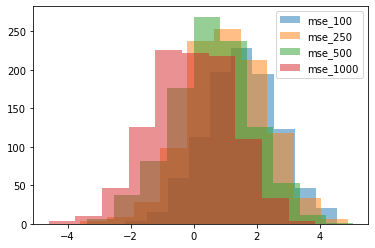

Vary Alpha Levels
Mean: 0.07277961264127399 Median: 0.06817494533794596 Mode: [[-4.58180165]] Variance: 2.155958210506294
Mean: 0.05474894235511695 Median: 0.0669470258243673 Mode: [[-4.61614538]] Variance: 1.6395195329611412
Mean: -7.077804632281835 Median: -7.0538312698572065 Mode: [[-10.69306832]] Variance: 1.5751020263126498
Mean: -12.80355459832137 Median: -12.852539398319635 Mode: [[-16.22283721]] Variance: 1.145919051312012


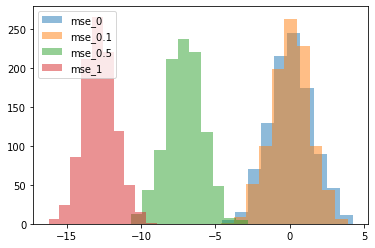

Vary Multiplicative Factors
Mean: 0.29944837717912587 Median: 0.3667387822486456 Mode: [[-3.08655689]] Variance: 1.3406300638165731
Mean: 0.0062557527923698475 Median: 0.05169198863810687 Mode: [[-4.1104498]] Variance: 1.7408416598290117
Mean: -0.06240982076178652 Median: -0.03341122073346196 Mode: [[-4.57845862]] Variance: 1.7537586729717949
Mean: -0.07747445214891999 Median: -0.10149058024880953 Mode: [[-4.03129111]] Variance: 1.7853643915985624


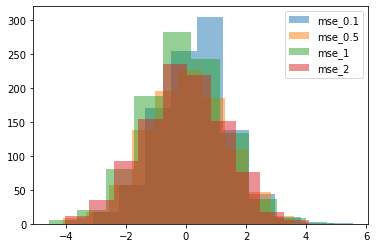

Vary X Variables
Mean: -1.3563039917652404 Median: -1.3728335125259146 Mode: [[-5.78293112]] Variance: 1.8645977948746293
Mean: -0.02270165160975692 Median: 0.004846386767644033 Mode: [[-4.33555955]] Variance: 1.6440329504416054
Mean: 1.2766029549522888 Median: 1.2470072044545986 Mode: [[-2.48752084]] Variance: 1.5664744401663548
Mean: 2.6261284236316254 Median: 2.624361551264707 Mode: [[-1.47584655]] Variance: 1.3368839370045134


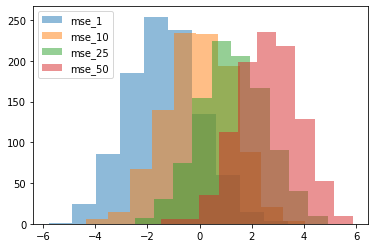

In [7]:
# Model = 4 is OlS - Lasso
print('Vary Observations')
vary_obs(4)
print('Vary Alpha Levels')
vary_alpha(4)
print('Vary Multiplicative Factors')
vary_multiply(4)
print('Vary X Variables')
vary_xvars(4)

Vary Observations
Mean: 0.4757856745146056 Median: 0.5100122777311191 Mode: [[-3.62297597]] Variance: 1.9687759683627233
Mean: -0.06631924416794316 Median: -0.03125599982788817 Mode: [[-4.62558838]] Variance: 2.1287200225091563
Mean: -0.542820119169448 Median: -0.5456525121708082 Mode: [[-5.04694498]] Variance: 1.9752240346531598
Mean: -1.152436908483399 Median: -1.1748271190171198 Mode: [[-4.98983541]] Variance: 1.9539502924111343


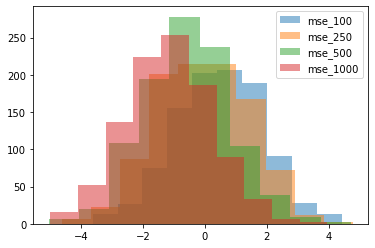

Vary Alpha Levels
Mean: 0.0023303838858584874 Median: 0.027740771033928146 Mode: [[-4.3100217]] Variance: 1.8090522914711813
Mean: -12.14482724856619 Median: -12.160984738498879 Mode: [[-15.119592]] Variance: 1.0442529112872097
Mean: -20.73224874009277 Median: -20.712268442971673 Mode: [[-23.03995185]] Variance: 0.589245952101362
Mean: -21.61188573176681 Median: -21.617074407900894 Mode: [[-24.56266351]] Variance: 0.69775733823453


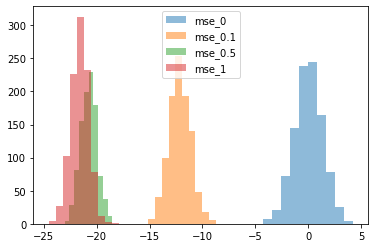

Vary Multiplicative Factors
Mean: 2.047260662895513 Median: 2.037600281737281 Mode: [[-2.22021936]] Variance: 1.7803346354055158
Mean: -0.12326938228262511 Median: -0.15164692777053213 Mode: [[-4.11940807]] Variance: 1.8630105469023703
Mean: -1.0619848089698456 Median: -1.1026970467731925 Mode: [[-4.95850915]] Variance: 1.7964263273403562
Mean: -2.708499088792743 Median: -2.7352610170045 Mode: [[-6.8264904]] Variance: 1.7734965030090788


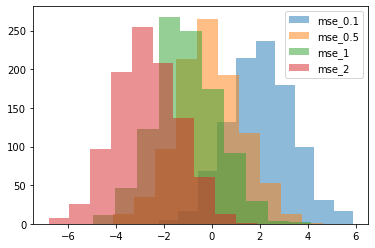

Vary X Variables
Mean: -1.3693063812839599 Median: -1.3585207821972876 Mode: [[-5.18462416]] Variance: 1.8997094932695215
Mean: -1.171292688919268 Median: -1.1900726757395796 Mode: [[-6.00241317]] Variance: 2.0553561323485434
Mean: -0.6578537542668892 Median: -0.6857854133335092 Mode: [[-4.62303383]] Variance: 1.9505082553227753
Mean: 0.03889021371402853 Median: 0.02795568269875985 Mode: [[-4.17641387]] Variance: 1.8578043380870144


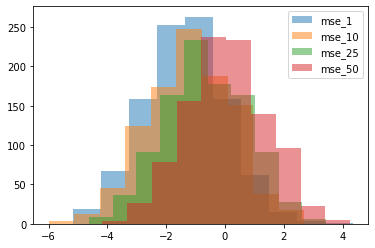

In [8]:
# Model = 5 is OlS - Ridge
print('Vary Observations')
vary_obs(5)
print('Vary Alpha Levels')
vary_alpha(5)
print('Vary Multiplicative Factors')
vary_multiply(5)
print('Vary X Variables')
vary_xvars(5)

Vary Observations
Mean: -1.5639388982882765 Median: -1.6000108766812162 Mode: [[-5.19713193]] Variance: 1.244038988542365
Mean: -1.3844876270989623 Median: -1.3828371644352027 Mode: [[-4.92912615]] Variance: 1.2127681444547547
Mean: -1.301314224992769 Median: -1.2787802060812996 Mode: [[-4.45866]] Variance: 1.3085526833028074
Mean: -1.105360313645577 Median: -1.0915982514208666 Mode: [[-5.37975416]] Variance: 1.113247236013448


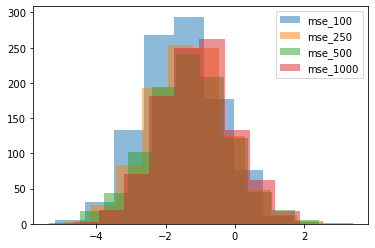

Vary Alpha Levels
Mean: -0.009525828890747691 Median: 0.03935684605482405 Mode: [[-5.30545818]] Variance: 1.905860564094159
Mean: -13.139691764865368 Median: -13.135254448874017 Mode: [[-16.45105566]] Variance: 1.02278235818159
Mean: -21.03075897224715 Median: -21.040792202034847 Mode: [[-23.80469496]] Variance: 0.6916339348235897
Mean: -21.861159134889277 Median: -21.886449674043753 Mode: [[-24.88848739]] Variance: 0.6978597090757301


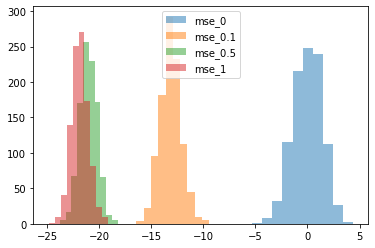

Vary Multiplicative Factors
Mean: -0.12526650833405714 Median: -0.11776088984516006 Mode: [[-4.33889765]] Variance: 1.3494144332104
Mean: 0.043356971492682896 Median: 0.03148326808205916 Mode: [[-4.43739927]] Variance: 1.6317947781637427
Mean: -1.0157334539509375 Median: -1.066124431499155 Mode: [[-4.54621053]] Variance: 1.228121476551325
Mean: -3.9612805301664054 Median: -3.9763584824245024 Mode: [[-7.90507724]] Variance: 1.2152373494462692


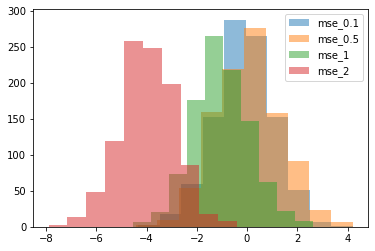

Vary X Variables
Mean: 1.2323748041182403 Median: 1.1659949504372311 Mode: [[-3.97305825]] Variance: 2.6664796456036637
Mean: -1.060571818793606 Median: -1.0186473432425383 Mode: [[-5.08624367]] Variance: 1.2519597933685167
Mean: -2.068636985699507 Median: -2.055161980846255 Mode: [[-5.47852081]] Variance: 1.1201658814134778
Mean: -3.1065404999682027 Median: -3.118710922341557 Mode: [[-6.34716874]] Variance: 1.0283622765495717


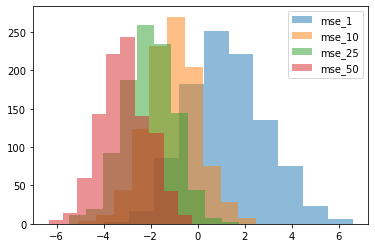

In [9]:
# Model = 6 is Lasso - Ridge
print('Vary Observations')
vary_obs(6)
print('Vary Alpha Levels')
vary_alpha(6)
print('Vary Multiplicative Factors')
vary_multiply(6)
print('Vary X Variables')
vary_xvars(6)